# Test R kernel in jupyter

In [1]:
library(tidyverse)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.2     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v ggplot2   3.4.2     v tibble    3.2.1
v lubridate 1.9.2     v tidyr     1.3.0
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Create fake data


In [2]:
df <- tibble(x = rnorm(100), y = rnorm(100))
df

x,y
<dbl>,<dbl>
-1.102129899,-0.056735829
-1.064939232,-0.449547691
1.444759113,0.893386761
0.871330023,0.053470808
0.323822372,-1.654639703
-0.005536224,-1.913971093
-0.229723375,-1.083338976
0.107402002,1.413743831
-0.825794716,-1.206588604


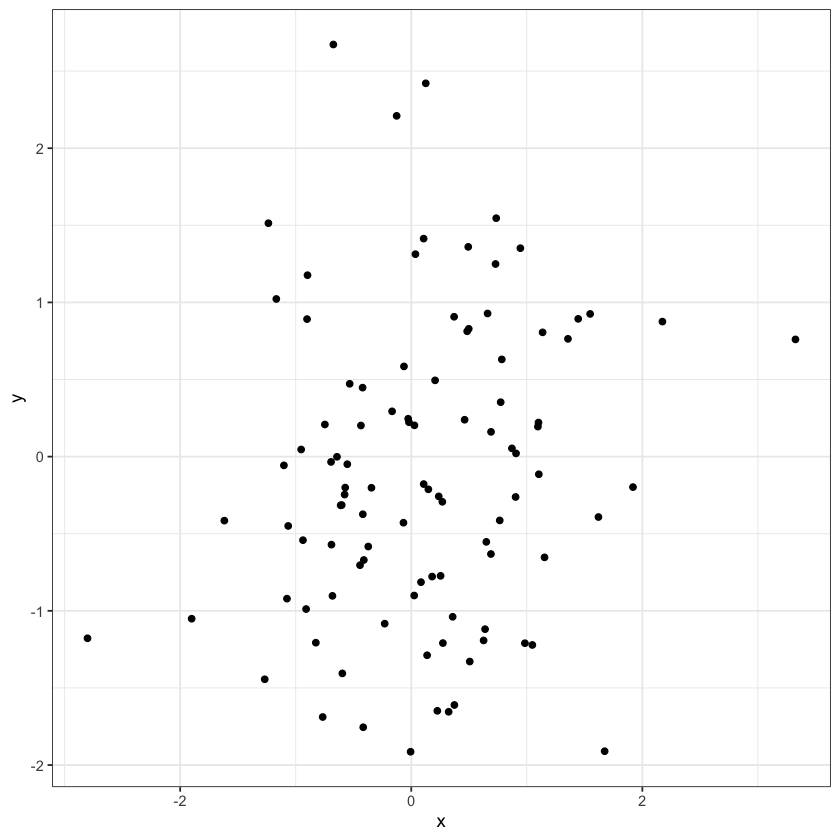

In [3]:
df %>%
    ggplot(aes(x, y)) +
    geom_point() +
    theme_bw()

# Install and upgrade packages using `renv` and `pak`

There is only one version of R in the system. Using `IRKernel` we expose this kernel to jupyter. But this doesn't ensure that there are project specific environments. For project specific package management we need additional packages.

Additional resources: 

https://rstudio.github.io/renv/articles/renv.html  
https://solutions.posit.co/envs-pkgs/environments/snapshot/  

**Important note**: whenever possible avoid building packages from source! Stick to compiled binaries instead.

## Starting from bare project and `pak` problems

When starting a new project folder you can start with `renv::init(bare = TRUE)` if you want to skip dependency checking in the global library and start from an empty directory instead

```
install.packages("renv")
install.packages("remotes")
renv::init(bare = TRUE)
remotes::install_cran("pak") 
```

`pak` installation can be a pain. If you get 

```
Error in load_private_package("cli") : 
  Cannot load cli from the private library
```
or similar errors you might have to download the [binary from CRAN](]https://cran.r-project.org/web/packages/pak/index.html) and replace the `pak > library` directory. 

If you're on a mac you might then need to autorize the use of all compiled objects from  `System Preference > Security & Privacy > General`.

If these becomes too big of a headache try `renv::install("broom")` and `renv::snapshot()` after each install.

## `renv` potential drawbacks

- Does not install the version of R listed in `renv.lock`
- Adds a bunch of directories in your project. Most are ignored but still bloats the directory with at least `activate.R`, `settings.json` and `renv.lock`
- Does not necessarily make sure that all dependencies will work together *but* does tell you if things are incompatible when initializing



### Quick check

Updated `dplyr` from the global version (2.3.2) to newer version only in this project (2.3.3). Confirm that the R kernel in the Jupyter NB does correctly imports from the project and not global library.

In [1]:
library(dbplyr)

In [2]:
sessionInfo()

R version 4.0.5 (2021-03-31)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Big Sur 10.16

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRblas.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRlapack.dylib

locale:
[1] C

attached base packages:
[1] stats     graphics  grDevices datasets  utils     methods   base     

other attached packages:
[1] dbplyr_2.3.3

loaded via a namespace (and not attached):
 [1] magrittr_2.0.3   tidyselect_1.2.0 uuid_1.1-0       R6_2.5.1        
 [5] rlang_1.1.0      fastmap_1.1.0    fansi_1.0.3      dplyr_1.1.1     
 [9] tools_4.0.5      utf8_1.2.2       cli_3.6.1        DBI_1.1.3       
[13] htmltools_0.5.3  yaml_2.3.5       digest_0.6.29    tibble_3.2.1    
[17] lifecycle_1.0.3  crayon_1.5.2     IRdisplay_1.1    repr_1.1.6      
[21] base64enc_0.1-3  vctrs_0.6.1      IRkernel_1.3.2   glue_1.6.2      
[25] evaluate_0.15    pbdZMQ_0.3-7     compiler_4.0.5   pillar

In [1]:
sessionInfo()

R version 4.0.5 (2021-03-31)
Platform: x86_64-apple-darwin17.0 (64-bit)
Running under: macOS Big Sur 10.16

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRblas.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/4.0/Resources/lib/libRlapack.dylib

locale:
[1] C

attached base packages:
[1] stats     graphics  grDevices datasets  utils     methods   base     

loaded via a namespace (and not attached):
 [1] fansi_1.0.3     crayon_1.5.2    utf8_1.2.2      digest_0.6.29  
 [5] IRdisplay_1.1   repr_1.1.6      lifecycle_1.0.3 jsonlite_1.8.7 
 [9] evaluate_0.15   pillar_1.9.0    rlang_1.1.1     cli_3.6.1      
[13] renv_1.0.0      uuid_1.1-0      vctrs_0.6.1     IRkernel_1.3.2 
[17] tools_4.0.5     glue_1.6.2      yaml_2.3.5      fastmap_1.1.0  
[21] compiler_4.0.5  base64enc_0.1-3 pbdZMQ_0.3-7    htmltools_0.5.3